In [1]:
import numpy as np
from scipy.signal import convolve2d 
from os import path, getcwd, system, getenv
from astropy.io import fits
from time import perf_counter
import urllib.request
import os

import matplotlib
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import matplotlib.gridspec as gridspec

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from matplotlib.backends.backend_pdf import PdfPages

import sys,inspect
currentdir = path.dirname(path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = path.dirname(currentdir)
sys.path.append(parentdir)
# from deconv import cube_deconv
# from ppxf_wrap import ppxf_wrap

# import warnings

# if True:
#     print('Set warnings.filterwarnings as "ignore"')
#     print('Warning Message will not be printed')
#     warnings.filterwarnings("ignore")

from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import constants
import pandas as pd

# import plotly.express as px
from astroquery.mast import Observations


from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.nddata.utils import Cutout2D

from astropy.wcs import WCS
import astropy

from urllib.error import HTTPError
from astroquery.skyview import SkyView



computer = 1
maindir = "C:/Users/maxri/Desktop/Classes 4-1/Research/fuse"
skydowni ="./images_redOb89"; 

In [2]:
#Create Object List/Save to Table From FUSE Catalog

catalogdir = "C:/Users/maxri/Desktop/Classes 4-1/Research/data/VI_129_fuse.dat.fits"
catalog = fits.open(catalogdir)

catheader = catalog[0]; catlist = catalog[1];

dflist = pd.DataFrame(catlist.data)



catalog.close()


ob88=dflist.query("Class ==88 and Avail=='y'"); ob89=dflist.query("Class==89 and Avail=='y' ");

dflist



obsn1 = [];obsn2=[];
for i in ob88.iterrows():
    b = [i[1][1].split()[0],i[1][2], i[1][3]] 
    obsn1.append(b)
    
for i in ob89.iterrows():
    b = [i[1][1].split()[0],i[1][2], i[1][3]] 
    obsn2.append(b)
    
obsn1
obsn2

s1 = maindir+"/tbls/Objects88.tbl"; s2 = maindir+"/tbls/Objects89.tbl"

np.savetxt(s1,obsn1,fmt="%s",delimiter = " ")
np.savetxt(s2,obsn2,fmt="%s", delimiter = " ")

In [12]:
ob89

Dataset                    Target     RAdeg    DEdeg  \
177   A0460102  NGC1705                    73.5562 -53.3609   
181   A0460103  NGC1705                    73.5562 -53.3609   
374   A0460201  NGC3310                   159.6900  53.5017   
389   A0460303  NGC4214                   183.9140  36.3264   
417   A0230606  IRAS19245-4140            291.9920 -41.5744   
511   A0860606  NGC7714                   354.0580   2.1553   
512   A0230404  NGC7714                   354.0590   2.1552   
543   A0460505  M83                       204.2520 -29.8668   
544   A0460404  NGC5253                   204.9830 -31.6408   
606   P1910101  MRK357                     20.6675  23.1694   
1061  A0230101  NGC3504                   165.7970  27.9725   
1064  B0040201  NGC3690                   172.1290  58.5614   
1217  B0040202  NGC3690                   172.1290  58.5614   
1256  B0220401  IIZW70                    222.7350  35.5717   
1258  B0220301  NGC4670                   191.3200  27.1250   
1260  B0220302  NGC4670                   191.3200  27.1250   
1262  B0220303  NGC4670                   191.3200  27.1250   
1316  B0220201  POX36                     179.7430 -19.0281   
1755  B0040101  IRAS08339+6517            129.5970  65.1211   
1815  B0040301  NGC7714                   354.0590   2.1553   
1858  P2520101  NGC5430                   210.1910  59.3289   
1861  C1310301  M82-C                     149.0130  69.6467   
1862  C1310201  M82-B                     149.0000  69.6547   
1863  C1310101  M82-A                     148.9880  69.6637   
1864  C1310401  M82-D                     148.9680  69.7151   
1881  B0040102  IRAS08339+6517            129.5970  65.1211   
2019  C0480301  NGC4194                   183.5400  54.5272   
2033  B0220101  HARO3                     161.3430  55.9603   
2164  A0460707  NGC4449-HII               187.0390  44.0877   
2166  A0460606  NGC4449-NUC               187.0450  44.0952   
2167  S4056201  NGC4194-BKGD              183.5400  54.5272   
2297  Z9091001  ESO290-01                 340.4700 -46.0933   
2306  Z9090201  IC4662                    266.7770 -64.6403   
2323  Z9091401  ESO185-13                 296.2530 -54.2503   
2545  C0480501  UGC5720                   158.1330  54.4008   
2574  Z9090701  MRK7                      112.0500  72.5748   
2651  Z9091201  MRK162                    166.2840  44.7472   
2664  Z9090101  MRK71                     112.2160  69.2086   
2745  D0390101  NGC3079                   150.4950  55.6806   
2857  Z9090901  NGC5408                   210.8380 -41.3789   
2876  C1720301  NGC3256                   156.9630 -43.9039   
2878  C1720302  NGC3256                   156.9630 -43.9039   
2957  C0480101  VV114                      16.9442 -17.5067   
3201  D0400101  NGC625                     23.7783 -41.4369   
3290  C0480201  NGC1741                    75.4071  -4.2586   
3331  C0480202  NGC1741                    75.4071  -4.2586   
4052  F3270804  NGC5879                   227.4450  57.0002   
4094  F3270801  NGC5879                   227.4450  57.0002   
4178  F3270601  NGC4605                   189.9970  61.6092   
4181  F3270401  NGC3738                   173.9530  54.5239   
4256  F3270602  NGC4605                   189.9970  61.6092   

                  ObsDate  ExpTime  Aper  Mode  Nexpo  Class Avail  
177   2000-02-04,18:12:54     8621  LWRS  TTAG      5     89     y  
181   2000-02-05,12:28:41    15409  LWRS  TTAG      8     89     y  
374   2000-05-05,19:01:44    27080  LWRS  TTAG     11     89     y  
389   2000-05-12,04:16:36    20641  LWRS  TTAG     11     89     y  
417   2000-05-21,03:18:40     5023  LWRS  TTAG      6     89     y  
511   2000-06-24,20:35:10     6025  LWRS  TTAG      2     89     y  
512   2000-06-24,23:54:07     5796  LWRS  TTAG      3     89     y  
543   2000-07-06,10:29:07    26539  LWRS  TTAG     19     89     y  
544   2000-07-07,18:08:52    27379  MDRS  TTAG     20     89     y  
606   2000-07-31,13:59:22    24563  LWRS

In [3]:
#Skyview Query by Object name or Coordinate, reads in the from Object table. 
#Image query block

size = 1600

width_val = u.Quantity(size, unit = 'arcsec')
height_val =  u.Quantity(size, unit = 'arcsec')

t3 = []
if computer == 2:
    t = pd.read_table("C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/objs2.tbl",header=None)
if computer == 1:
    t = pd.read_table("C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/tbls/objs2.tbl",header=None)
    
    
    #CHange this to change whats happening, currently on Obs89, bigger list
if computer == 1:
    t2 = pd.read_table(s2,header=None)
    
for i in t.values:
    t3.append(i[0])


coordsn = [];t4=[]


for i in t2.values:
    b = i[0].split()
    c = SkyCoord(b[1],b[2], unit=u.deg)
    coordsn.append(c)
    t4.append(b[0])
    
coordsn
    

objnames = t3; objnamesn = t4;


obstables2 = []; coords = [];

#pixels initially 300 x 300
#Initial Skyview Query by name

surveys = ['DSS', 'DSS1 Blue', 'DSS1 Red', 'DSS2 Red', 'DSS2 Blue', 'DSS2 IR'] #use surveyindex = 3 Dss2red

surveyindex = 3


for i in range(len(objnamesn)):
        paths = [];
        try:
            paths = SkyView.get_images(position = coordsn[i], 
                       survey=surveys[surveyindex],width = width_val,height = height_val,pixels = [1000,1000])
            hdr = paths[0][0].header
            a = hdr['HISTORY'][33].split()
            cd= [float(a[2]),float(a[3])]
            print(objnamesn[i],surveys[surveyindex])
            c = SkyCoord(cd[0],cd[1], unit=u.deg)
            coords.append(c)
    
        except HTTPError:
            print("No Result for ", objnamesn[i], surveys[surveyindex])
        obstables2.append(paths)
        
        
objnames = objnamesn
        
result = pd.DataFrame(obstables2)

obstables2, result, objnamesn,coords
#objnamesn, coordsn

NGC1705 DSS2 Red
NGC1705 DSS2 Red
NGC3310 DSS2 Red
NGC4214 DSS2 Red
IRAS19245-4140 DSS2 Red
NGC7714 DSS2 Red
NGC7714 DSS2 Red
M83 DSS2 Red
NGC5253 DSS2 Red
MRK357 DSS2 Red
NGC3504 DSS2 Red
NGC3690 DSS2 Red
NGC3690 DSS2 Red
IIZW70 DSS2 Red
NGC4670 DSS2 Red
NGC4670 DSS2 Red
NGC4670 DSS2 Red
POX36 DSS2 Red
IRAS08339+6517 DSS2 Red
NGC7714 DSS2 Red
NGC5430 DSS2 Red
M82-C DSS2 Red
M82-B DSS2 Red
M82-A DSS2 Red
M82-D DSS2 Red
IRAS08339+6517 DSS2 Red
NGC4194 DSS2 Red
HARO3 DSS2 Red
NGC4449-HII DSS2 Red
NGC4449-NUC DSS2 Red
NGC4194-BKGD DSS2 Red
ESO290-01 DSS2 Red
IC4662 DSS2 Red
ESO185-13 DSS2 Red
UGC5720 DSS2 Red
MRK7 DSS2 Red
MRK162 DSS2 Red
MRK71 DSS2 Red
NGC3079 DSS2 Red
NGC5408 DSS2 Red
NGC3256 DSS2 Red
NGC3256 DSS2 Red
VV114 DSS2 Red
NGC625 DSS2 Red
NGC1741 DSS2 Red
NGC1741 DSS2 Red
NGC5879 DSS2 Red
NGC5879 DSS2 Red
NGC4605 DSS2 Red
NGC3738 DSS2 Red
NGC4605 DSS2 Red


([[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932C2D1F00>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932C9DB820>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932C3224D0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932BF4FDF0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932C7D9750>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932DCD1E40>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932BEA48E0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932BCE2230>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932C93FCA0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932BEA7FA0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932BF5EE90>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932DC287F0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002932BE67D90>]],
  [[<astropy.io.fits.hdu.

In [4]:
#Skyview Download Images Code Block, to same convention as before

result;
coords
for i in range(len(result)):
    a = surveys[surveyindex].split() #Survey
    b = objnames[i].split()
    name = b[0] #+ b[1]     #OBjName
    if i < 9:
        fname = "000{}_{}_{}_{}_{}".format(i+1,coords[i].ra.deg,coords[i].dec.deg,a[0]+a[1],name)
    else:
        fname = "00{}_{}_{}_{}_{}".format(i+1,coords[i].ra.deg,coords[i].dec.deg,a[0]+a[1],name)
    #print(fname)
    result[0][i][0].writeto(skydowni+ "/"+fname+".fits", output_verify='exception', overwrite=True, checksum=False)
    
    

In [5]:
#MAin FUSE DOWNLOAD BLOCK
def set_rcparams_prop(amp=1, fs=22, tickamp=None):
    fs=18
    if tickamp==None:
        tickamp=amp
    tickmajorwidth=2.5*amp
    tickminorwidth=2.5*amp
    axeslw=2.5*amp
    tmjs=6*tickamp
    tmns=tmjs/3.5*2
    plt.rcParams['axes.titlesize']=fs
    plt.rcParams['axes.labelsize']=fs
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    plt.rcParams['axes.linewidth'] = axeslw
    plt.rcParams['xtick.major.width'] = tickmajorwidth
    plt.rcParams['ytick.major.width'] = tickmajorwidth
    plt.rcParams['xtick.minor.width'] = tickminorwidth
    plt.rcParams['ytick.minor.width'] = tickminorwidth
    plt.rcParams['xtick.major.size'] = tmjs
    plt.rcParams['ytick.major.size'] = tmjs
    plt.rcParams['xtick.minor.size'] = tmns
    plt.rcParams['ytick.minor.size'] = tmns

obs_tables=[]
for i in range(len(objnames)):
    print(objnames[i]) #objectname=objname[i] vs coordinates=coordsn[i] Object Name vs Coordinate Query
    obs_tables.append(Observations.query_criteria(obs_collection='FUSE',coordinates=coordsn[i], radius=".5 deg"))

#Main Fuse Download
fnames=[]


#download files
if computer == 1:
    down_dir=maindir + "/temp"
if computer == 2:
    down_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/temp'

for i in range(len(obs_tables)):
# for i in [6]:
    otb=obs_tables[i]
    pl=Observations.get_product_list(obs_tables[i])
    urls=pl['dataURI']
    rr=[x.find('00000all2ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    print(urls)
    manifest = Observations.download_products(dpl, download_dir=down_dir)
    print(obs_tables[i]['target_name'])
    print(manifest)
    
    rr=[x.find('00000all4ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    print(urls)
    manifest = Observations.download_products(dpl, download_dir=down_dir)
    print(obs_tables[i]['target_name'])
    print(manifest)
    
#     rr=[x.find('00000all3ttag') for x in urls]
#     dpl=pl[np.array(rr)>0]
#     print(urls)
#     manifest = Observations.download_products(dpl, download_dir=down_dir)
#     print(obs_tables[i]['target_name'])
#     print(manifest)
#     needs documentation
    
#     exptimes=obs_tables[4]['t_exptime']
# #     print(exptimes)
# #     cond=exptimes>5000
#     # print(obs_tables[4][cond])
#     fexptimes=obs_tables[4][cond]['t_exptime']
    

NGC1705
NGC1705
NGC3310
NGC4214
IRAS19245-4140
NGC7714
NGC7714
M83
NGC5253
MRK357
NGC3504
NGC3690
NGC3690
IIZW70
NGC4670
NGC4670
NGC4670
POX36
IRAS08339+6517
NGC7714
NGC5430
M82-C
M82-B
M82-A
M82-D
IRAS08339+6517
NGC4194
HARO3
NGC4449-HII
NGC4449-NUC
NGC4194-BKGD
ESO290-01
IC4662
ESO185-13
UGC5720
MRK7
MRK162
MRK71
NGC3079
NGC5408
NGC3256
NGC3256
VV114
NGC625
NGC1741
NGC1741
NGC5879
NGC5879
NGC4605
NGC3738
NGC4605
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0460102/a0460102001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460102/a0460102002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460102/a0460102003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460102/a0460102004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460102/a0460102005fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460102/a0460102701fesafraw.fit.gz
    mast:FUSE/url/pub/

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460103000\a046010300000all4ttagfcal.fit.gz with expected size 612705. [astroquery.query]
target_name
-----------
    NGC1705
    NGC1705
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460102000\a046010200000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460103000\a046010300000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0460102/a0460102001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460102/a0460102002fesafraw.fit.gz
 

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460103000\a046010300000all4ttagfcal.fit.gz with expected size 612705. [astroquery.query]
target_name
-----------
    NGC1705
    NGC1705
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460102000\a046010200000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460103000\a046010300000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0460201/a0460201001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460201/a0460201002fesafraw.fit.gz
 

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303005fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303006fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303007fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303008fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303009fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460303/a0460303010fesafraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0460303/a046030300200all4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0230606/a0230606001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0230606/a0230606003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0230606/a0230606005fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0230606/a0230606701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230606/a02306060011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230606/a02306060011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230606/a02306060012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230606/a02306060012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230606/a02306060021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230606/a02306060021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0230606/a02306060062asic4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0230404/a0230404001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0230404/a0230404002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0230404/a0230404003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0230404/a0230404701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230404/a02304040011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230404/a02304040011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230404/a02304040012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230404/a02304040012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230404/a02304040021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0230404/a02304040021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/c0370206/c037020600100all2ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370202000\c037020200000all2ttagfcal.fit.gz with expected size 606994. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370203000\c037020300000all2ttagfcal.fit.gz with expected size 578854. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370204000\c037020400000all2ttagfcal.fit.gz with expected size 613577. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370205000\c037020500000all2ttagfcal.fit.gz with expected size 601529. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370206000\c037020600000all2ttagfcal.fit.gz with expected size 607477. [astroquery.query]
target_name
-----------
    NGC7714
    NGC7714
    NGC7714
    N

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404005fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404006fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404007fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404008fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404009fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0460404/a0460404010fesafraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0460404/a046040401100all2ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101005fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101006fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101007fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101008fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101009fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1910101/p1910101701fesafraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/p1910101/p191010100100all4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/b0040201/b0040201001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0040201/b0040201002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0040201/b0040201003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0040201/b0040201004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0040201/b0040201005fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/b0040201/b00402010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/b0040201/b00402010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/b0040201/b00402010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/b0040201/b00402010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/b0040201/b00402010021attagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/b0040202/b004020201100all4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040202000\b004020200000all4ttagfcal.fit.gz with expected size 612044. [astroquery.query]
target_name
-----------
    NGC3690
    NGC3690
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040201000\b004020100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040202000\b004020200000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/b0040201/b0040201001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0040201/b0040201002fesafraw.fit.gz
 

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040202000\b004020200000all4ttagfcal.fit.gz with expected size 612044. [astroquery.query]
target_name
-----------
    NGC3690
    NGC3690
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040201000\b004020100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040202000\b004020200000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/b0220401/b0220401001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0220401/b0220401002fesafraw.fit.gz
 

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\m9980601000\m998060100000all4ttagfcal.fit.gz with expected size 611892. [astroquery.query]
target_name
-----------
     IIZw70
   STIMLAMP
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220401000\b022040100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\m9980601000\m998060100000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/b0220301/b0220301001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0220301/b0220301002fesafraw.fit.gz
 

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220301000\b022030100000all4ttagfcal.fit.gz with expected size 608754. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220302000\b022030200000all4ttagfcal.fit.gz with expected size 609699. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220303000\b022030300000all4ttagfcal.fit.gz with expected size 609705. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d0150201000\d015020100000all4ttagfcal.fit.gz with expected size 600116. [astroquery.query]
target_name
-----------
    NGC4670
    NGC4670
    NGC4670
 PG1243+275
                                                     Local Path                                                      ...
-----------------------------------------------------------

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220302000\b022030200000all4ttagfcal.fit.gz with expected size 609699. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220303000\b022030300000all4ttagfcal.fit.gz with expected size 609705. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d0150201000\d015020100000all4ttagfcal.fit.gz with expected size 600116. [astroquery.query]
target_name
-----------
    NGC4670
    NGC4670
    NGC4670
 PG1243+275
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220301000\b022030100000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220302000\b022030200000all4ttagfcal.fit.gz with expected size 609699. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220303000\b022030300000all4ttagfcal.fit.gz with expected size 609705. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d0150201000\d015020100000all4ttagfcal.fit.gz with expected size 600116. [astroquery.query]
target_name
-----------
    NGC4670
    NGC4670
    NGC4670
 PG1243+275
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220301000\b022030100000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220201000\b022020100000all4ttagfcal.fit.gz with expected size 608590. [astroquery.query]
target_name
-----------
      Pox36
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220201000\b022020100000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/b0040101/b0040101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0040101/b0040101002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0040101/b0040101003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0040101/b0040101004fesafraw.f

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040102000\b004010200000all4ttagfcal.fit.gz with expected size 614761. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0780101000\b078010100000all4ttagfcal.fit.gz with expected size 599079. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1020601000\c102060100000all4ttagfcal.fit.gz with expected size 618450. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d9100201000\d910020100000all4ttagfcal.fit.gz with expected size 619428. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\u1023901000\u102390100000all4ttagfcal.fit.gz with expected size 614816. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040301000\b004030100000all4ttagfcal.fit.gz with expected size 611197. [astroquery.query]
target_name
-----------
    NGC7714
    NGC7714
    NGC7714
    NGC7714
    NGC7714
    NGC7714
    NGC7714
    NGC7714
    NGC7714
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0230404000\a023040400000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0860606000\a086060600000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040301000\b004030100000all4ttagfcal.fit.gz ...
                               dataURI                               
------

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/c1310101/c1310101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1310101/c1310101701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010021bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010022attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010022bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/c1310401/c13104010031blif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310201000\c131020100000all4ttagfcal.fit.gz with expected size 615430. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310301000\c131030100000all4ttagfcal.fit.gz with expected size 617437. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310401000\c131040100000all4ttagfcal.fit.gz with expected size 616795. [astroquery.query]
target_name
-----------
      M82-B
      M82-C
      M82-A
      M82-D
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310101000\c131010100000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310201000\c131020100000all4ttagfcal.fit.gz with expected size 615430. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310301000\c131030100000all4ttagfcal.fit.gz with expected size 617437. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310401000\c131040100000all4ttagfcal.fit.gz with expected size 616795. [astroquery.query]
target_name
-----------
      M82-B
      M82-D
      M82-A
      M82-C
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310101000\c131010100000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310201000\c131020100000all4ttagfcal.fit.gz with expected size 615430. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310301000\c131030100000all4ttagfcal.fit.gz with expected size 617437. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310401000\c131040100000all4ttagfcal.fit.gz with expected size 616795. [astroquery.query]
target_name
-----------
      M82-A
      M82-C
      M82-D
      M82-B
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310101000\c131010100000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310201000\c131020100000all4ttagfcal.fit.gz with expected size 615430. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310301000\c131030100000all4ttagfcal.fit.gz with expected size 617437. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310401000\c131040100000all4ttagfcal.fit.gz with expected size 616795. [astroquery.query]
target_name
-----------
      M82-D
      M82-A
      M82-C
      M82-B
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310101000\c131010100000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0040102000\b004010200000all4ttagfcal.fit.gz with expected size 614761. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0780101000\b078010100000all4ttagfcal.fit.gz with expected size 599079. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1020601000\c102060100000all4ttagfcal.fit.gz with expected size 618450. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d9100201000\d910020100000all4ttagfcal.fit.gz with expected size 619428. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\u1023901000\u102390100000all4ttagfcal.fit.gz with expected size 614816. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\s4056201000\s405620100000all4ttagfcal.fit.gz with expected size 611652. [astroquery.query]
target_name 
------------
     NGC4194
NGC4194-BKGD
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0480301000\c048030100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\s4056201000\s405620100000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/b0220101/b0220101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/b0220101/b0220101003fesafraw.fit.

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\g0210101000\g021010100000all4ttagfcal.fit.gz with expected size 587541. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\g0210102000\g021010200000all4ttagfcal.fit.gz with expected size 396883. [astroquery.query]
target_name
-----------
      Haro3
    NGC3353
    NGC3353
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0220101000\b022010100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\g0210101000\g021010100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\g021010200

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460707000\a046070700000all4ttagfcal.fit.gz with expected size 611454. [astroquery.query]
target_name
-----------
NGC4449-NUC
NGC4449-HII
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460606000\a046060600000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460707000\a046070700000all4ttagfcal.fit.gz ...
                                 dataURI                                  
--------------------------------------------------------------------------
      mast:FUSE/url/missions/fuse/data/a0460606/a0460606001fesafraw.fit.gz
      mast:FUSE/url/missions/fuse/data/a0460606/a0460606

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460606000\a046060600000all4ttagfcal.fit.gz with expected size 608006. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460707000\a046070700000all4ttagfcal.fit.gz with expected size 611454. [astroquery.query]
target_name
-----------
NGC4449-NUC
NGC4449-HII
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460606000\a046060600000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0460707000\a046070700000all4ttagfcal.fit.gz ...
                               dataURI                               
------------------------

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\s4056201000\s405620100000all4ttagfcal.fit.gz with expected size 611652. [astroquery.query]
target_name 
------------
     NGC4194
NGC4194-BKGD
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0480301000\c048030100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\s4056201000\s405620100000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/z9091001/z9091001001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/z9091001/z9091001002fesafraw.fit.

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/h0740201/h0740201001fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/h0740201/h0740201002fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/h0740201/h0740201005fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/h0740201/h0740201006fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/h0740201/h0740201007fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/h0740201/h0740201008fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/h0740201/h0740201009fesbfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/h0740201/h07402010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/h0740201/h07402010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/h0740201/h07402010012attagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/z9090201/z909020100700all4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\m9001001000\m900100100000all4ttagfcal.fit.gz with expected size 610439. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\m9001101000\m900110100000all4ttagfcal.fit.gz with expected size 611160. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\u1093701000\u109370100000all4ttagfcal.fit.gz with expected size 612284. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9090201000\z909020100000all4ttagfcal.fit.gz with expected size 610481. [astroquery.query]
   target_name    
------------------
          HD160635
BKGND-DOORS-CLOSED
BKGND-DOORS-CLOSED
            IC4662
            IC4662
                                                     Local Path                                                      ..

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\g0200203000\g020020300000all4ttagfcal.fit.gz with expected size 391740. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\g0200204000\g020020400000all4ttagfcal.fit.gz with expected size 579751. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9091401000\z909140100000all4ttagfcal.fit.gz with expected size 605764. [astroquery.query]
target_name
-----------
ESO185-G013
ESO185-G013
ESO185-G013
  ESO185-13
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\g0200201000\g020020100000all4ttagfcal.fit.gz ...
C:/U

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902001fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902002fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902003fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902006fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902007fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902008fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902009fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902010fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902011fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/u1021902/u1021902012fesbfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/z9090703/z90907030052alif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9090701000\z909070100000all4ttagfcal.fit.gz with expected size 399797. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9090703000\z909070300000all4ttagfcal.fit.gz with expected size 609484. [astroquery.query]
target_name
-----------
       MRK7
       MRK7
       MRK7
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\u1021902000\u102190200000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9090701000\z909070100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z909070300

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9102101000\z910210100000all4ttagfcal.fit.gz with expected size 611228. [astroquery.query]
target_name
-----------
     MRK162
     AN-UMA
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9091201000\z909120100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9102101000\z910210100000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/g7130601/g7130601001fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/g7130601/g7130601005fesbfraw.fit.gz
 

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\u1022002000\u102200200000all4ttagfcal.fit.gz with expected size 611443. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9090101000\z909010100000all4ttagfcal.fit.gz with expected size 609656. [astroquery.query]
target_name 
------------
       MRK71
NGC2363-FUV1
       MRK71
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\g7130601000\g713060100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\u1022002000\u102200200000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\z9090

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p2072901000\p207290100000all4ttagfcal.fit.gz with expected size 605344. [astroquery.query]
target_name
-----------
    NGC3079
    NGC3079
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d0390101000\d039010100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p2072901000\p207290100000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/z9090901/z9090901001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/z9090901/z9090901002fesafraw.fit.gz
 

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301005fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301006fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301007fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301008fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301009fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301010fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1720301/c1720301011fesafraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/c1720303/c17203030062asic4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1720302000\c172030200000all4ttagfcal.fit.gz with expected size 618587. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1720303000\c172030300000all4ttagfcal.fit.gz with expected size 618240. [astroquery.query]
target_name
-----------
    NGC3256
    NGC3256
    NGC3256
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1720301000\c172030100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1720302000\c172030200000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c172030300

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1720302000\c172030200000all4ttagfcal.fit.gz with expected size 618587. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1720303000\c172030300000all4ttagfcal.fit.gz with expected size 618240. [astroquery.query]
target_name
-----------
    NGC3256
    NGC3256
    NGC3256
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1720301000\c172030100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1720302000\c172030200000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c172030300

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101005fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101006fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101007fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101008fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101009fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d0400101/d0400101010fesafraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/d0400101/d040010101400all2ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/c0480201/c0480201001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c0480201/c0480201002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c0480201/c0480201003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c0480201/c0480201004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c0480201/c0480201005fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c0480201/c0480201006fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c0480201/c0480201007fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c0480201/c0480201008fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c0480201/c0480201701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c0480201/c04802010011attagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/c0480202/c04802020031blif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0480202000\c048020200000all4ttagfcal.fit.gz with expected size 605245. [astroquery.query]
target_name
-----------
    NGC1741
    NGC1741
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0480201000\c048020100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0480202000\c048020200000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/f3270801/f3270801001fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/f3270801/f3270801002fesbfraw.fit.gz
 

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270803000\f327080300000all4ttagfcal.fit.gz with expected size 609710. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270804000\f327080400000all4ttagfcal.fit.gz with expected size 609451. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270805000\f327080500000all4ttagfcal.fit.gz with expected size 597710. [astroquery.query]
target_name
-----------
    NGC5879
    NGC5879
    NGC5879
    NGC5879
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270801000\f327080100000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270803000\f327080300000all4ttagfcal.fit.gz with expected size 609710. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270804000\f327080400000all4ttagfcal.fit.gz with expected size 609451. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270805000\f327080500000all4ttagfcal.fit.gz with expected size 597710. [astroquery.query]
target_name
-----------
    NGC5879
    NGC5879
    NGC5879
    NGC5879
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270801000\f327080100000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270602000\f327060200000all4ttagfcal.fit.gz with expected size 607142. [astroquery.query]
target_name
-----------
    NGC4605
    NGC4605
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270601000\f327060100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270602000\f327060200000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/f3270401/f3270401001fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/f3270401/f3270401002fesbfraw.fit.gz
 

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270402000\f327040200000all4ttagfcal.fit.gz with expected size 393636. [astroquery.query]
target_name
-----------
    NGC3738
    NGC3738
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270401000\f327040100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270402000\f327040200000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/f3270601/f3270601001fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/f3270601/f3270601002fesbfraw.fit.gz
 

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270602000\f327060200000all4ttagfcal.fit.gz with expected size 607142. [astroquery.query]
target_name
-----------
    NGC4605
    NGC4605
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270601000\f327060100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f3270602000\f327060200000all4ttagfcal.fit.gz ...


In [6]:
# Pointings download/Creating organised Data Frames


if computer == 1:
    down_dir=maindir + '/temp/'
if computer == 2:
    down_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/temp/'
    

df=pd.DataFrame()

# for i in range(1):

for i in range(len(obs_tables)):
    otb=obs_tables[i]
    pl=Observations.get_product_list(obs_tables[i])
    urls=pl['dataURI']
    rr=[x.find('00000all4ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    objname=objnames[i]
    for j in range(len(dpl)):
#     for j in range(1):
        fdir=down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
        hdu=fits.open(fdir)
        hdr=hdu[0].header
        sri=pd.Series({'objname':objname, 
                       'targname':hdr['TARGNAME'],
                       'ra':hdr['RA_TARG'],
                       'dec':hdr['DEC_TARG'],
                       'pa':hdr['APER_PA'],
                       'aperture':hdr['APERTURE'],
                       'programid':hdr['PRGRM_ID'],
                       'exptime':hdr['OBSTIME'],
                       'obsmode':hdr['INSTMODE'],
                       'fdir':down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
                      })
        print(hdr['APERTURE'])
        df=df.append(sri, ignore_index=True)
        
    rr=[x.find('00000all2ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    objname=objnames[i]
    for j in range(len(dpl)):
#     for j in range(1):
        fdir=down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
        hdu=fits.open(fdir)
        hdr=hdu[0].header
        sri=pd.Series({'objname':objname, 
                       'targname':hdr['TARGNAME'],
                       'ra':hdr['RA_TARG'],
                       'dec':hdr['DEC_TARG'],
                       'pa':hdr['APER_PA'],
                       'aperture':hdr['APERTURE'],
                       'programid':hdr['PRGRM_ID'],
                       'exptime':hdr['OBSTIME'],
                       'obsmode':hdr['INSTMODE'],
                       'fdir':down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
                      })
        print(hdr['APERTURE'])
        df=df.append(sri, ignore_index=True)

# hdr        
#     manifest = Observations.download_products(dpl, download_dir=down_dir)
#     print(manifest)

LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
MDRS
MDRS
MDRS
MDRS
MDRS
MDRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

LWRS
LWRS
LWRS
MDRS
MDRS
MDRS
MDRS
MDRS
MDRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


MDRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
RFPT


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

LWRS
LWRS
LWRS
MDRS
MDRS
MDRS
MDRS
MDRS
MDRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

LWRS
RFPT


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
RFPT
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
RFPT
RFPT
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


MDRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


In [7]:
#Max & Mean exposure calc

tcut=5000
tcut=2000
ndf=df[df['exptime']>tcut]

df2=pd.DataFrame()


for i in range(len(objnames)):
    print(objnames[i])
    adf=ndf[ndf['objname']==objnames[i]]
    adf.index=np.arange(len(adf))
    sri=pd.Series({
        'objname':objnames[i],
        'ra':adf.loc[0,'ra'],
        'dec':adf.loc[0,'dec'],
        'npt':len(adf),
        'maxexp':np.max(adf.loc[:,'exptime'].values),
        'meanexp':np.mean(adf.loc[:,'exptime'].values),
    })
    df2=df2.append(sri, ignore_index=True)
df2


# Table: 
# Galaxy, Program ID, N pointings (exp >5000s), RA, DEC, Max Exp, Mean Exp
# *note on aperture
# *RA DEC unit check



NGC1705
NGC1705
NGC3310
NGC4214
IRAS19245-4140
NGC7714
NGC7714
M83
NGC5253
MRK357
NGC3504
NGC3690
NGC3690
IIZW70
NGC4670
NGC4670
NGC4670
POX36
IRAS08339+6517
NGC7714
NGC5430
M82-C
M82-B
M82-A
M82-D
IRAS08339+6517
NGC4194
HARO3
NGC4449-HII
NGC4449-NUC
NGC4194-BKGD
ESO290-01
IC4662
ESO185-13
UGC5720
MRK7
MRK162
MRK71
NGC3079
NGC5408
NGC3256
NGC3256
VV114
NGC625
NGC1741
NGC1741
NGC5879
NGC5879
NGC4605
NGC3738
NGC4605


C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ip

objname          ra        dec  npt   maxexp       meanexp
0          NGC1705   73.556167 -53.360944    4  15409.0  12015.000000
1          NGC1705   73.556167 -53.360944    4  15409.0  12015.000000
2          NGC3310  159.690375  53.501667    1  27066.0  27066.000000
3          NGC4214  183.914208  36.326417    1  20641.0  20641.000000
4   IRAS19245-4140  291.991750 -41.574361    1   4986.0   4986.000000
5          NGC7714  354.058750   2.155167   24  51926.0  15674.250000
6          NGC7714  354.058750   2.155167   24  51926.0  15674.250000
7              M83  204.252125 -29.866806    1  26539.0  26539.000000
8          NGC5253  204.983208 -31.640833    1  27379.0  27379.000000
9           MRK357   20.667500  23.169444    1  24548.0  24548.000000
10         NGC3504  165.796708  27.972500    1  13548.0  13548.000000
11         NGC3690  172.129167  58.561389    4  42081.0  29075.500000
12         NGC3690  172.129167  58.561389    4  42081.0  29075.500000
13          IIZW70  222.735417  35.571667    2  10989.0   7263.500000
14         NGC4670  191.320417  27.125000    9  15966.0  11777.000000
15         NGC4670  191.320417  27.125000    9  15966.0  11777.000000
16         NGC4670  191.320417  27.125000    9  15966.0  11777.000000
17           POX36  179.742917 -19.028056    1  25394.0  25394.000000
18  IRAS08339+6517  129.596667  65.121111   14  64540.0  30242.571429
19         NGC7714  354.058750   2.155167   24  51926.0  15674.250000
20         NGC5430  210.190833  59.328889    1  33750.0  33750.000000
21           M82-C  148.987917  69.663750    4  11049.0   9401.750000
22           M82-B  148.987917  69.663750    4  11049.0   9401.750000
23           M82-A  148.987917  69.663750    4  11049.0   9401.750000
24           M82-D  148.987917  69.663750    4  11049.0   9401.750000
25  IRAS08339+6517  129.596667  65.121111   14  64540.0  30242.571429
26         NGC4194  183.540417  54.527222    2  89394.0  55689.000000
27           HARO3  161.343333  55.960278    3  13014.0   9794.000000
28     NGC4449-HII  187.045042  44.095250    2  13425.0  10690.500000
29     NGC4449-NUC  187.045042  44.095250    2  13425.0  10690.500000
30    NGC4194-BKGD  183.540417  54.527222    2  89394.0  55689.000000
31       ESO290-01  340.469792 -46.093306    1  18138.0  18138.000000
32          IC4662  266.433250 -64.723806    5  55481.0  32261.000000
33       ESO185-13  296.252208 -54.250833    3  13444.0   6131.333333
34         UGC5720  158.132917  54.400833    1  30927.0  30927.000000
35            MRK7  112.050167  72.574833    3  15952.0  11654.333333
36          MRK162  166.284125  44.747250    2  10109.0   9874.500000
37           MRK71  112.124292  69.192167    3  18637.0  16077.333333
38         NGC3079  150.495375  55.680583    2  58902.0  32583.500000
39         NGC5408  210.837917 -41.378889    1  17719.0  17719.000000
40         NGC3256  156.963417 -43.903922    6  44901.0  31595.666667
41         NGC3256  156.963417 -43.903922    6  44901.0  31595.666667
42           VV114   16.944167 -17.506667    1  14027.0  14027.000000
43          NGC625   23.778333 -41.436944    1  58745.0  58745.000000
44         NGC1741   75.407083  -4.258611    4  21382.0  14692.000000
45         NGC1741   75.407083  -4.258611    4  21382.0  14692.000000
46         NGC5879  227.444875  57.000194    8   8896.0   5965.750000
47         NGC5879  227.444875  57.000194    8   8896.0   5965.750000
48         NGC4605  189.997417  61.609194    4   5106.0   3562.000000
49         NGC3738  173.953292  54.523889    2   4194.0   4177.000000
50         NGC4605  189.997417  61.609194    4   5106.0   3562.000000

In [8]:
#Setup functions for plots, roudnings and rotating
def fstr(x):
    return x

def ff6(x):
    return '%.6f' % x


def ff4(x):
    return '%.4f' % x

def ff1(x):
    return '%.1f' % x

def ff2(x):
    return '%.2f' % x

def fint(x):
    return '%i' % x

def detection_check(x):
    if x>3:
        return 'Y'
    else:
        return 'N'

    
def rec_rotate(cx, cy, wx, wy, ang_deg): #angle: clocowise rot from 12h
    ang_rad=np.radians(ang_deg)
    wd=(wx**2+wy**2)**0.5
    ang_diagonal=np.arctan(wy/wx)
    ang_new=ang_diagonal+ang_rad
    rx=cx-wd/2*np.cos(ang_new)
    ry=cy-wd/2*np.sin(ang_new)
    return rx, ry
    
df2['randec']=df2['ra'].apply(ff4)+', '+df2['dec'].apply(ff4)
df2['totalexp']=df2['meanexp']*df2['npt']

# coords = SkyCoord(df2['ra'], df2['dec'], frame='icrs', unit=(u.hourangle, u.deg))
coords = SkyCoord(df2['ra'], df2['dec'], frame='icrs', unit=(u.deg, u.deg))
df2['l']=coords.galactic.l.degree
df2['b']=coords.galactic.b.degree
# df2['rvel']=[269,850,308,500,133,465,241,-39,841,259,1127,757,976,470,610,528] #Radial Velocities
rvel = [2790,3400,-12.2,1647.9,4925,-42.5, -6.2,-101.1,850.0,-106.5,8.9,200,-46.6,200,-4.3,42.1]
rvel = np.repeat(rvel,4,axis=0)
rvel = rvel[0:len(objnames)]
df2['rvel']=rvel #Test Radial Velocities
#df2['rvel']=[269]

df2['lnb']=df2['l'].apply(ff4)+', '+df2['b'].apply(ff4)

df2['owave']=1031.9*(1+df2['rvel']/299790)

# fmts=[fstr, ff4, ff4, fint, fint, fint]
# fmts=[fstr, ff4, ff4, fint, fint, fint,ff1]
fmts=[fstr, fstr, fint, fint, fint,ff1]
# fmts=[fstr, fstr, fint, fint, fint, fint]
# ridx1=[8,9,3,4,5,6,7,0,1,2]
latex_text=df2.to_latex(index=False, header=False,
                        formatters=fmts,
#              columns=['objname','ra','dec','npt','maxexp','totalexp'])
#              columns=['objname','l','b','npt','maxexp','totalexp'])
#              columns=['objname','l','b','npt','maxexp','totalexp','owave'])
             columns=['objname','lnb','npt','maxexp','totalexp','owave'])
#              columns=['objname','ra','dec','npt','maxexp','meanexp'])
print(latex_text)

print('\hline')
print(' & & & '+fint(np.sum(df2['npt']))+' & &  '+fint(np.sum(df2['npt']*df2['meanexp'])))

# df2.to_csv('adap_2022_targets.csv')

\begin{tabular}{llrrrr}
\toprule
       NGC1705 & 261.0784, -38.7434 &  4 & 15409 &  48060 & 1041.5 \\
       NGC1705 & 261.0784, -38.7434 &  4 & 15409 &  48060 & 1041.5 \\
       NGC3310 &  156.6069, 54.0630 &  1 & 27066 &  27066 & 1041.5 \\
       NGC4214 &  160.2530, 78.0754 &  1 & 20641 &  20641 & 1041.5 \\
IRAS19245-4140 & 356.9413, -24.0955 &  1 &  4986 &   4986 & 1043.6 \\
       NGC7714 &  88.2157, -55.5641 & 24 & 51926 & 376182 & 1043.6 \\
       NGC7714 &  88.2157, -55.5641 & 24 & 51926 & 376182 & 1043.6 \\
           M83 &  314.5816, 31.9720 &  1 & 26539 &  26539 & 1043.6 \\
       NGC5253 &  314.8601, 30.1052 &  1 & 27379 &  27379 & 1031.9 \\
        MRK357 & 132.1987, -39.1397 &  1 & 24548 &  24548 & 1031.9 \\
       NGC3504 &  204.6027, 66.0401 &  1 & 13548 &  13548 & 1031.9 \\
       NGC3690 &  141.9086, 55.4059 &  4 & 42081 & 116302 & 1031.9 \\
       NGC3690 &  141.9086, 55.4059 &  4 & 42081 & 116302 & 1037.6 \\
        IIZW70 &   58.7613, 63.2474 &  2 & 10989 &  14527

C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\2842855064.py:60: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_text=df2.to_latex(index=False, header=False,


In [9]:
#Reading in downloaded fits and labeling
if computer == 1:
    file_dir=maindir +'/images_red'      #manual
    file_dir = maindir +  skydowni[1:]     #Skyview
if computer == 2:
    file_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/images_red'      #manual
    file_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/images_redTEST'  #Skyview
    
file_path=np.array(glob.glob(file_dir+'**/*fits'))
file_path[0].split('_')
# file_path[0].split('/')

fdf=pd.DataFrame()
for i in range(len(file_path)):
    fp=file_path[i]
    print(fp)
    sri=pd.Series({'ra':fp.split('_')[2],
                   'dec':fp.split('_')[3],
                   'file_path':file_dir+'/'+fp.split('/')[-1],
                   'filename':fp.split('/')[-1],
                  })
    fdf=fdf.append(sri, ignore_index=True)
    
    
print(fdf)

print(fdf.filename[0])
print(fdf.file_path[0])

fdf.file_path[0]


C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0001_73.5562_-53.3609_DSS2Red_NGC1705.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0002_73.5562_-53.3609_DSS2Red_NGC1705.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0003_159.69_53.5017_DSS2Red_NGC3310.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0004_183.914_36.3264_DSS2Red_NGC4214.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0005_291.992_-41.5744_DSS2Red_IRAS19245-4140.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0006_354.058_2.1553_DSS2Red_NGC7714.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0007_354.059_2.1552_DSS2Red_NGC7714.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0008_204.252_-29.8668_DSS2Red_M83.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0009_204.983_-31.6408_DSS2Red_NGC5253.fits
C:/Users/maxri/Desktop/Classes 4-1/Resear

C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_11932\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Tem

'C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/images_redOb89/fuse\\images_redOb89\\0001_73.5562_-53.3609_DSS2Red_NGC1705.fits'

0
0.2
NGC1705
0
number of matched DF 2
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0001_73.5562_-53.3609_DSS2Red_NGC1705.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 73.5562  -53.3609  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (73.55616667, -53.34094444)>
npt 4
NGC1705
0
number of matched DF 2
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0001_73.5562_-53.3609_DSS2Red_NGC1705.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 73.5562  -53.3609  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (73.55616667, -53.36094444)>
npt 4
NGC3310
0
number of matched DF 1
C:/Users/maxri/Desktop/Classes 4-1/Rese

MDRS!!!
MDRS!!!
MDRS!!!
MDRS!!!
MDRS!!!
MDRS!!!
MDRS!!!
NGC5430
0
number of matched DF 1
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0021_210.191_59.3289_DSS2Red_NGC5430.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 210.191  59.3289  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (210.190833, 59.326889)>
npt 1
M82-C
0
number of matched DF 4
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0022_149.013_69.6467_DSS2Red_M82-C.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 149.013  69.6467  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (148.987917, 69.66375)>
npt 4
M82-B
0
number of matched DF 4
C:/Users

NGC3256
0
number of matched DF 2
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0041_156.963_-43.9039_DSS2Red_NGC3256.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 156.963  -43.9039  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (156.963417, -43.903922)>
npt 6
VV114
0
number of matched DF 1
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb89\0043_16.9442_-17.5067_DSS2Red_VV114.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 16.9442  -17.5067  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (16.944167, -17.506667)>
npt 1
NGC625
0
number of matched DF 1
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_r

<Figure size 1440x2160 with 0 Axes>

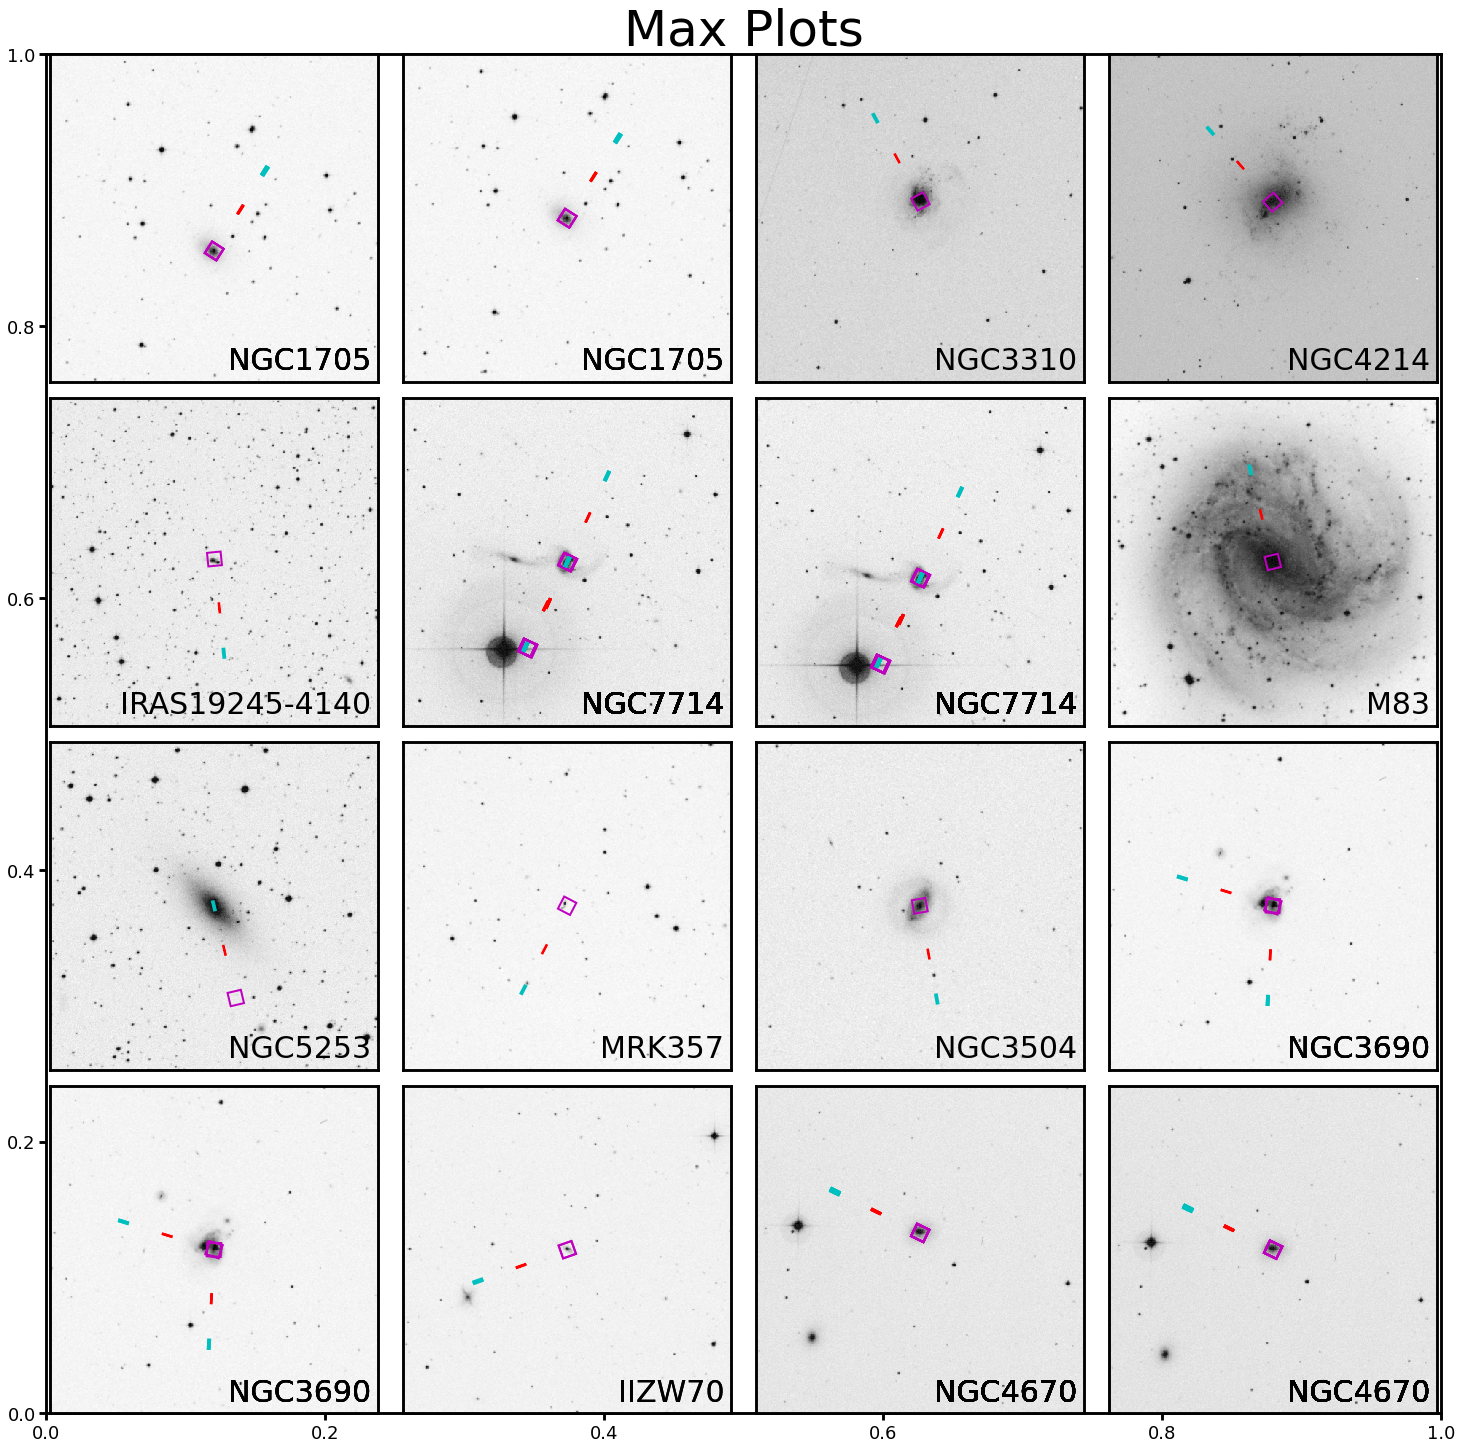

<Figure size 1440x2160 with 0 Axes>

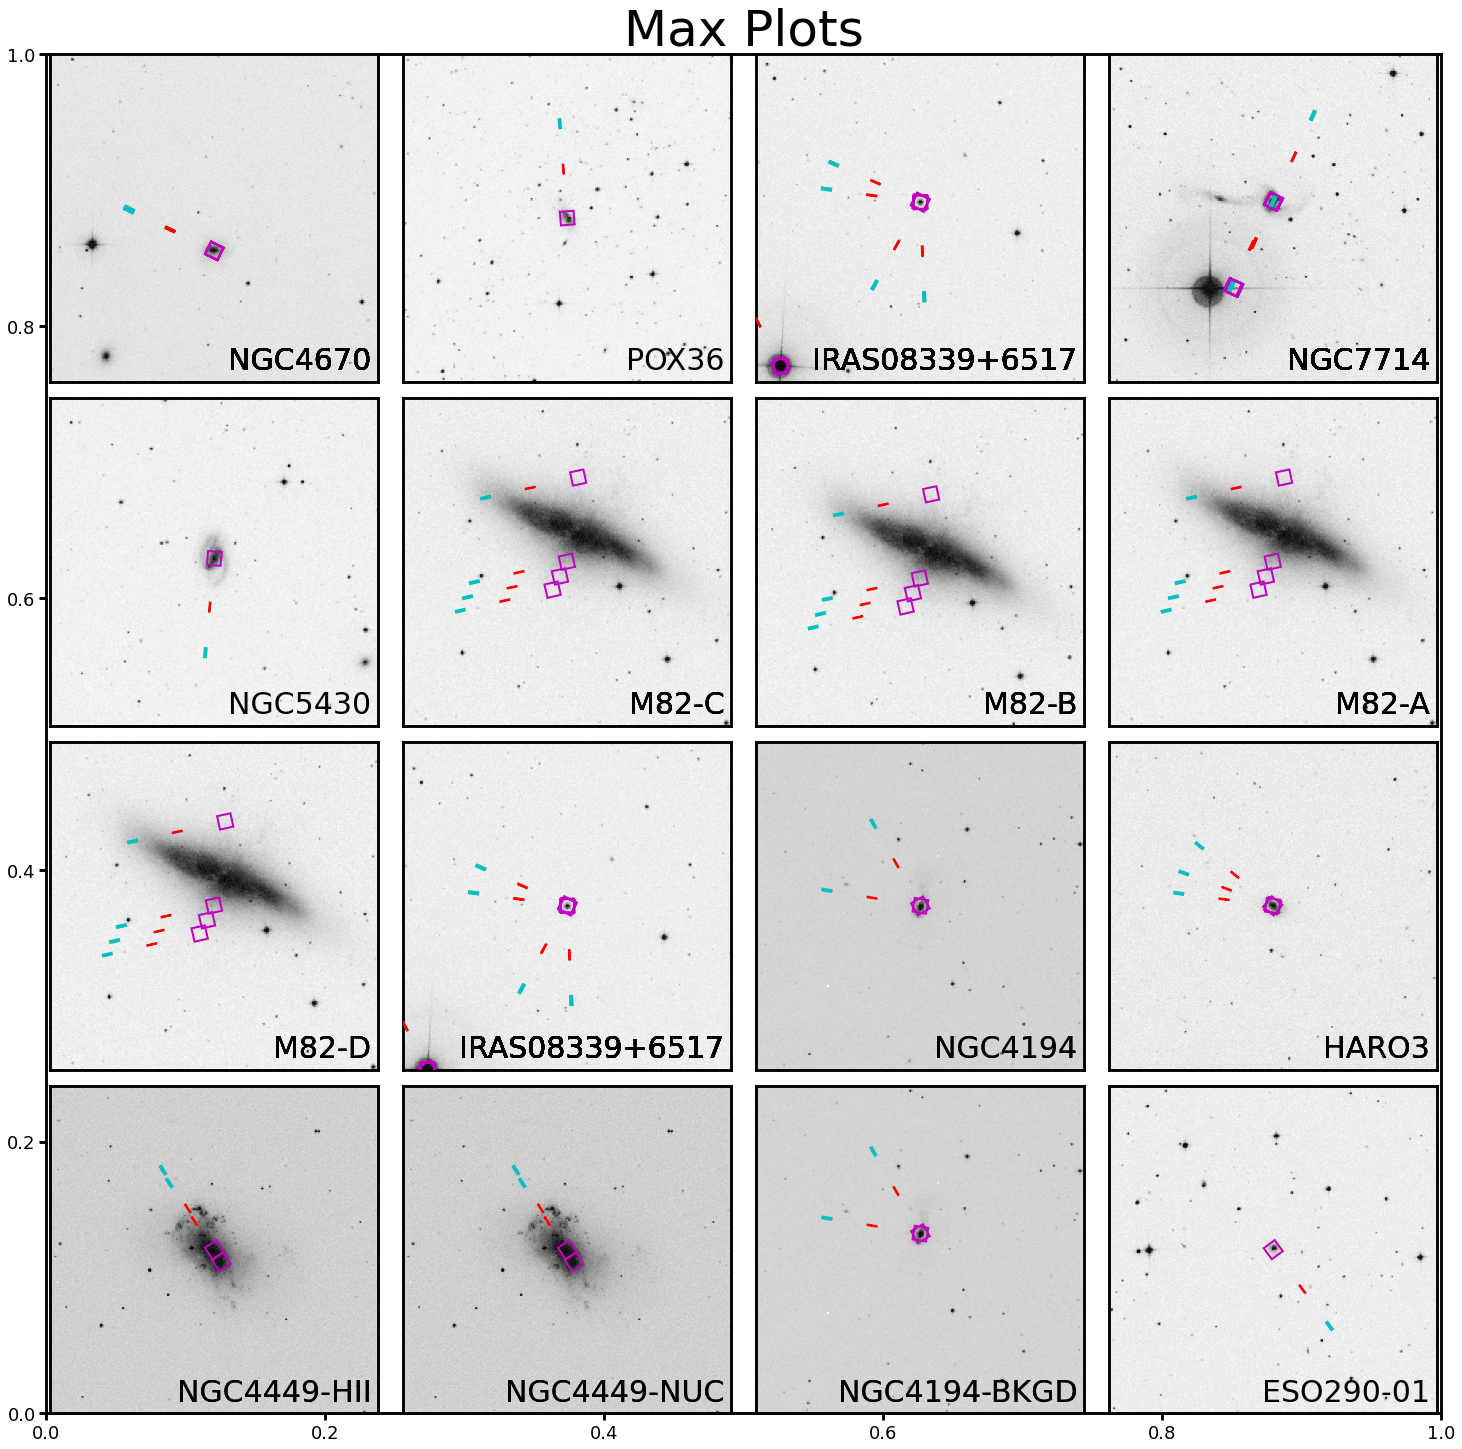

<Figure size 1440x2160 with 0 Axes>

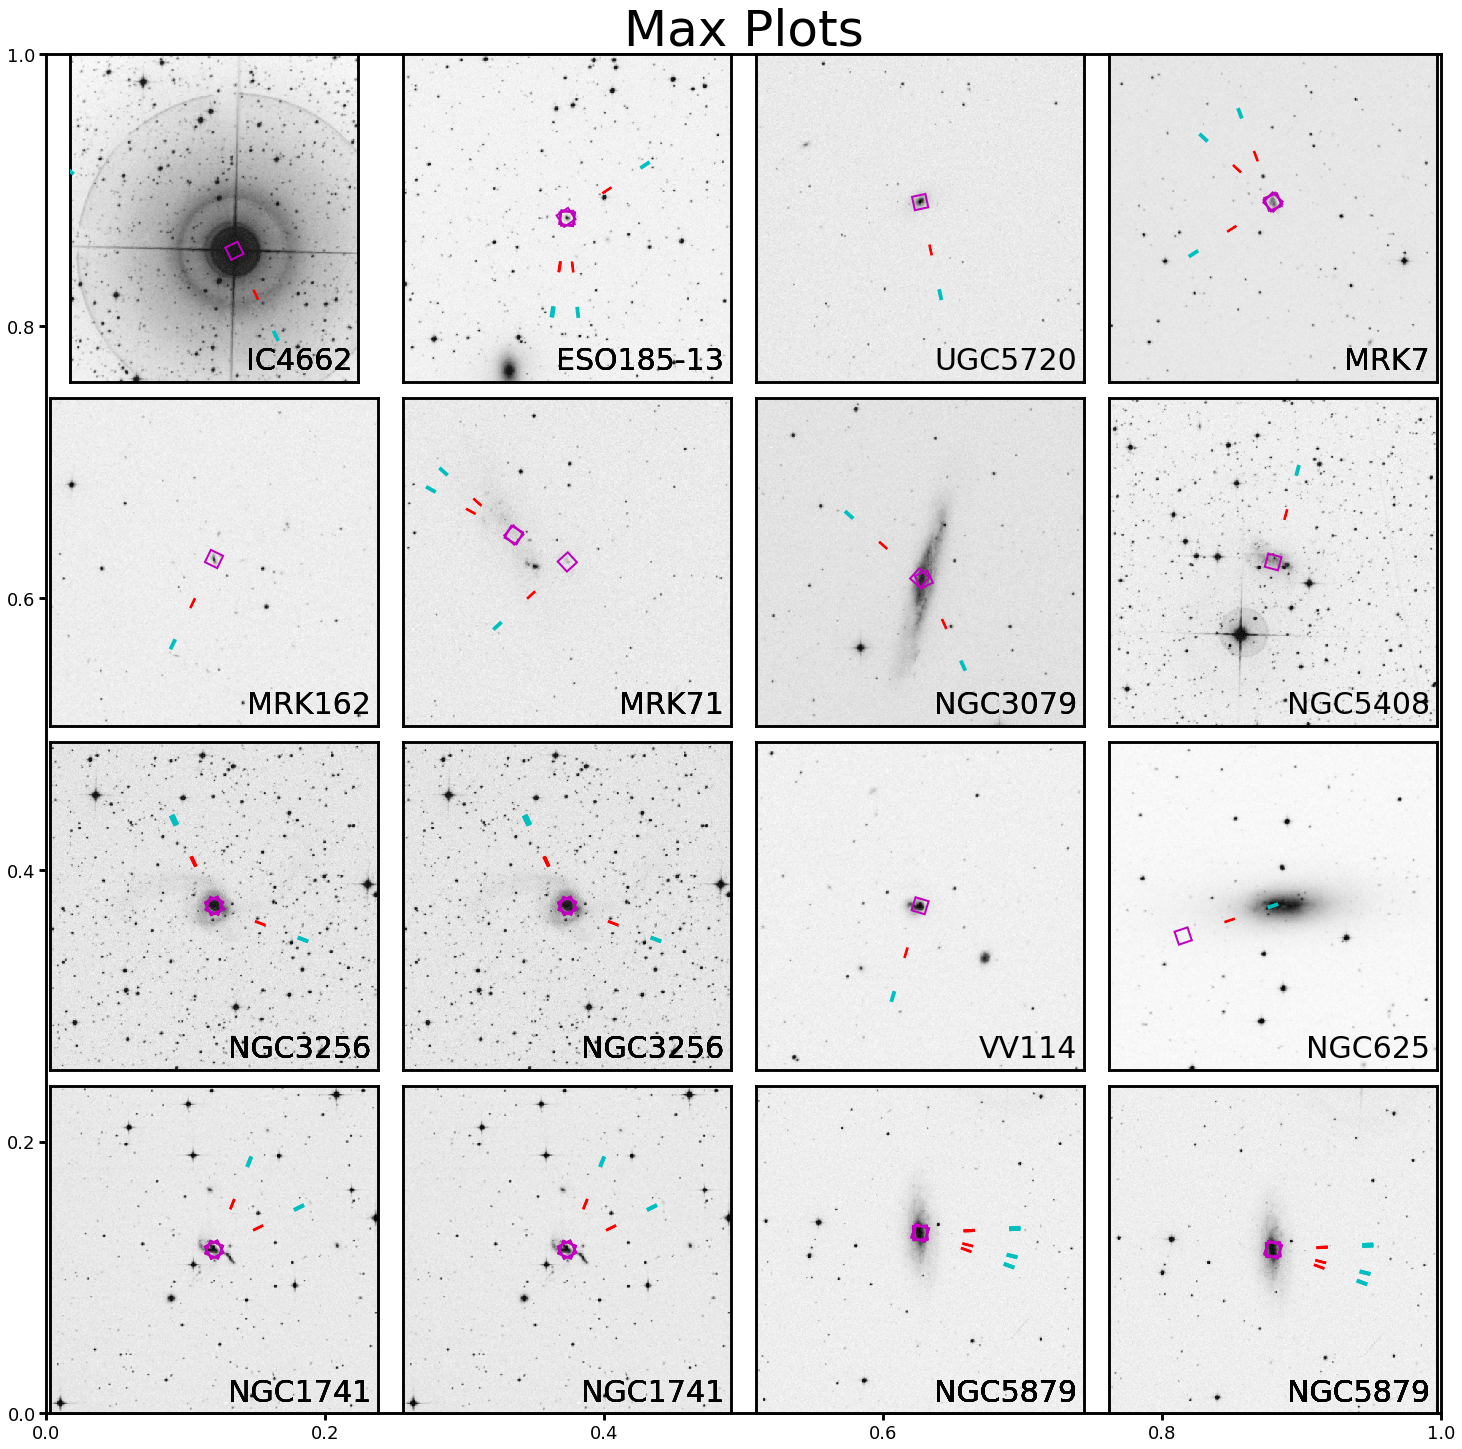

<Figure size 1440x2160 with 0 Axes>

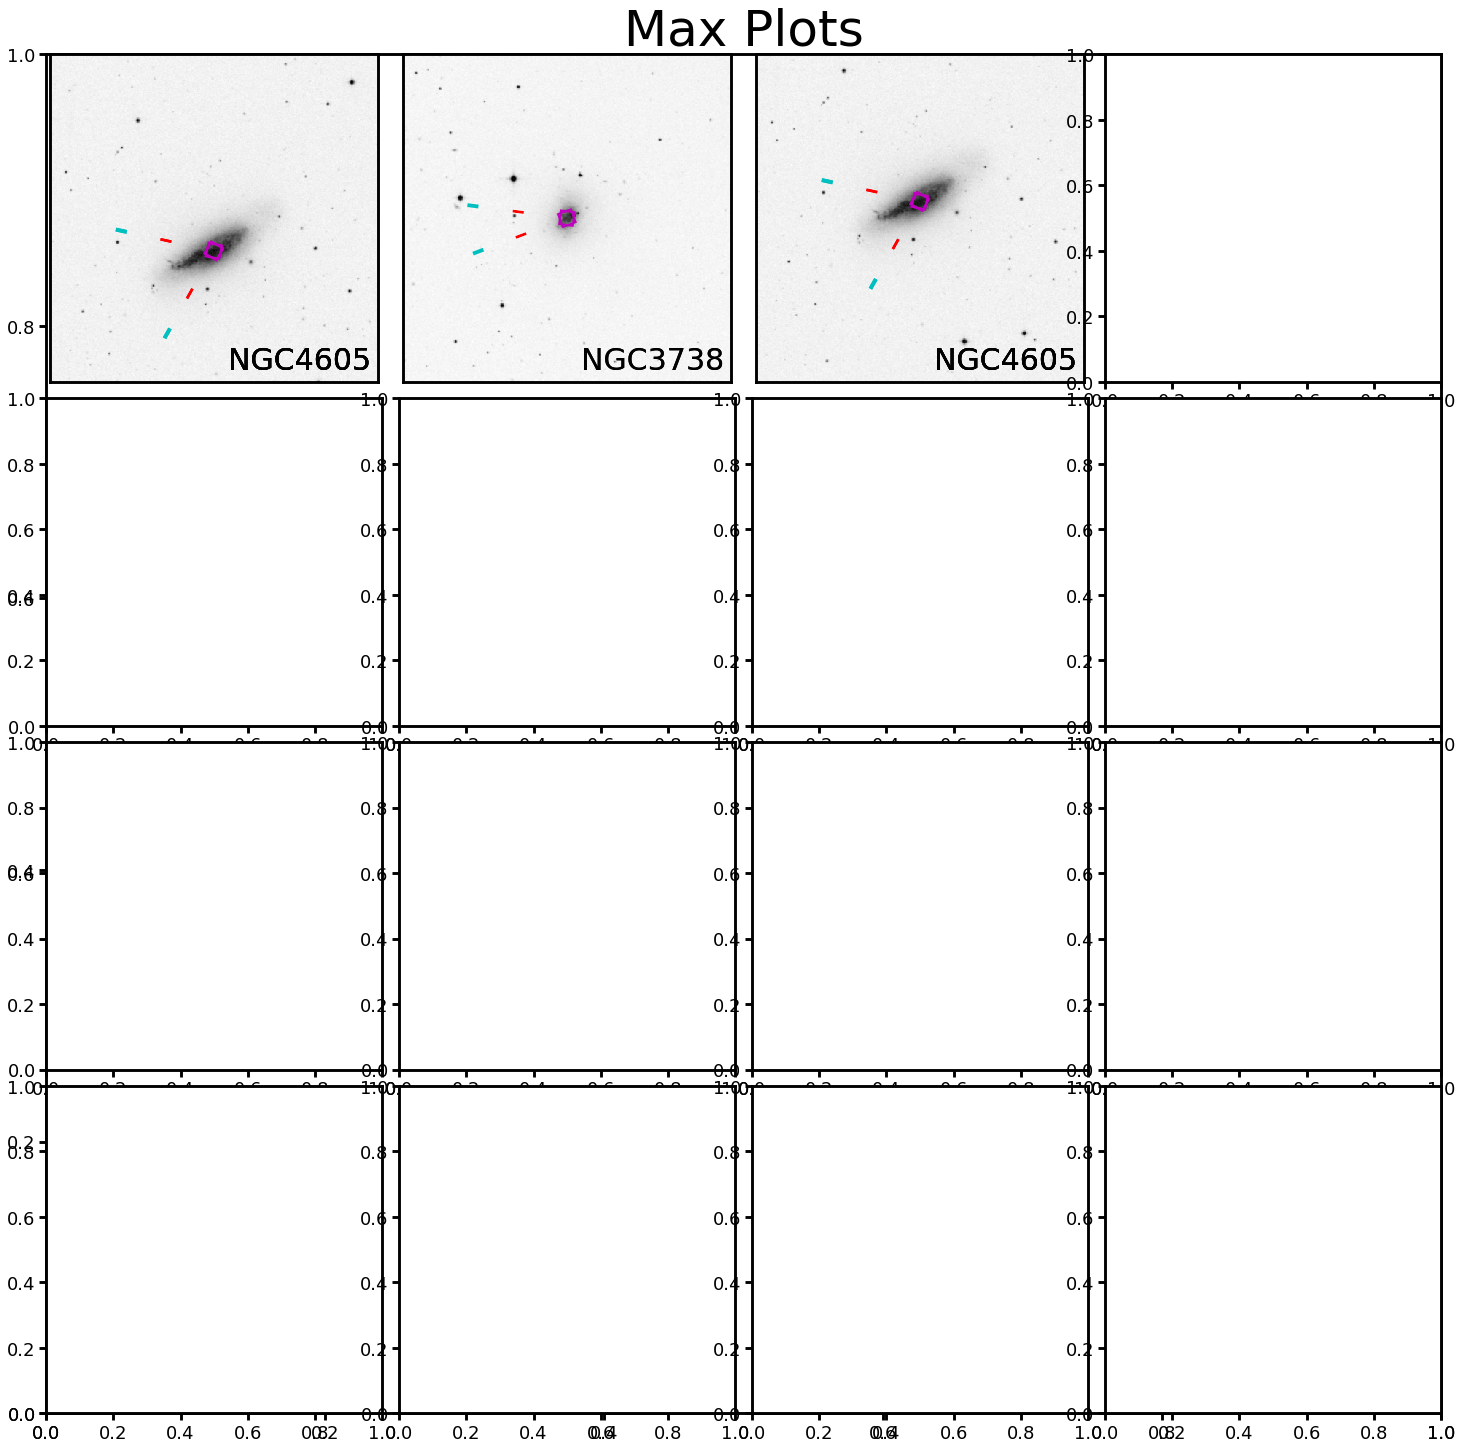

In [10]:
#Main Plotting Block

def p16(pg):
    set_rcparams_prop(amp=1.15)

    rr=1
    aa=6
    wrs=np.array([1.8, 0.2, 1.2, 0.05])
    hrs=np.array([1])
    fig = plt.figure(figsize=(20, 30))
    fig = plt.figure(figsize=(25, 25))
    plt.title("Max Plots",fontdict={'fontsize': 50})
    ncol=4
    nrow=4
    gs1 = gridspec.GridSpec(nrow, ncol, figure=fig, 
    #                         width_ratios=wrs, height_ratios=hrs,
                            hspace=0.05, wspace=0.05
                           )
    pidxs=np.arange(ncol*nrow)
    axs=[]
    for i in range(len(pidxs)):
        ax=fig.add_subplot(gs1[i // ncol, i%ncol])
        axs.append(ax)


    fidx=[0,0,0,0,0,
          0,0,0,0,0,
          0,0,0,0,0,
          0,0,0,0
         ]

    # fidx=[1,0,0,0,0,
    #       0,0,1,0,0,
    #       0,0,0,0,0,
    #       0,0,0,0
    #      ]

    # fidx=[1,0,0,0,0,
    #       0,0,1,0,0,
    #       1,0,0,1,0,
    #       0,0,0,0
    #      ]                 #Working for RED

    # fidx=[1,1,1,1,1,
    #       1,1,1,1,1,
    #       1,1,1,1,1,
    #       1,1,1,1
    #      ]

    # cut_widths=np.array([
    #     350,300,400,400,
    #     400,400,1400,1600,
    #     600,1600,300,250,
    #     250,250,500,400,
    # ])/3600*2           # Working for RED

    cut_widths=np.array([
        240,240,240,240,
        240,240,240,240,
        240,240,240,240,
        240, 240,240,240,
    ])/3600*3 

    print(cut_widths[1])


    raoffs=np.array(
        [0,0,0,0,
         0.0,0,0.0,0,
         0,0,0,0,
         0,0,0,0,
        ]
    )

    decoffs=np.array(
        [0.1,0,-0.05,-0.05,
         -0.01,0,.05,0,
         0,0,0,0,
         0,0,-0.05,0,
        ]
    )

    minsep=0.5
    file_sc=SkyCoord(fdf.ra, fdf.dec, frame='icrs', unit='deg')    


    for i in range(0,16,1):

        ax=axs[i]
        try:
            objname=objnames[i + 16*pg]
        except:
            break
        print(objname)
        sdf=df.loc[df['objname']==objname,:]
        sdf.index=np.arange(len(sdf))
        ra0, dec0=sdf.loc[0,'ra'], sdf.loc[0,'dec']
    #     print(ra0, dec0)
        c = SkyCoord(ra0, dec0, frame='icrs', unit='deg')

        cond=np.array(file_sc.separation(c))<minsep
        match_df=fdf[cond]
        match_df.index=np.arange(np.sum(cond))

        if computer ==1:
            fits_file=match_df.loc[fidx[i],'file_path'][0:48] + match_df.loc[fidx[i],'file_path'][64:] #61forblue,60forred
            fits_file=match_df.loc[fidx[i],'file_path'][0:44] + match_df.loc[fidx[i],'file_path'][64:] #Skyview
        if computer == 2:
            fits_file=match_df.loc[fidx[i],'file_path'][0:62] + match_df.loc[fidx[i],'file_path'][78:] #Other comp
            fits_file=match_df.loc[fidx[i],'file_path'][0:58] + match_df.loc[fidx[i],'file_path'][78:] #Other comp Skyview

        print(fidx[i])
        print('number of matched DF', len(match_df))
        hdu=fits.open(os.path.normpath(fits_file))
        hdr=hdu[0].header
        oiwcs=astropy.wcs.WCS(header=hdr) 
        print(fits_file)

        cmap=cm.gray_r
        origin='lower'

        oim=hdu[0].data

        ra0, dec0=sdf.loc[0,'ra']+cut_widths[i]*raoffs[i], sdf.loc[0,'dec']+cut_widths[i]*decoffs[i]
    #     print(ra0, dec0)
        cc = SkyCoord(ra0, dec0, frame='icrs', unit='deg')

        print(oiwcs,cc)
        print('npt',len(sdf))
        img_cutout_obj=Cutout2D(oim, cc, 
                           u.Quantity(cut_widths[i], unit='deg'),
                           wcs=oiwcs,
                        mode='trim',
    #                     mode='partial',
                       )

        im=img_cutout_obj.data
        iwcs=img_cutout_obj.wcs


        img=ax.matshow(im, 
                   cmap=cmap, 
                   origin=origin, interpolation='none', 
    #                zorder=1,
    #               alpha=alpha, zorder=zorder, aspect=aspect, 
    #                norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
                      )
    #     print(objname)


        for j in range(len(sdf)):
            jra, jdec=sdf.loc[j,'ra'], sdf.loc[j,'dec']        
            c_obj=SkyCoord(jra, jdec, 
                                              unit='deg',
                                              frame='icrs')
            if sdf.loc[j,'aperture']=='MDRS':
                sep=u.Quantity(-90.18-118.07, unit='arcsec')
                c_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)
                print('MDRS!!!')

            sep=u.Quantity(90.18+118.07, unit='arcsec')
            m_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)
            sep=u.Quantity(-10.27+118.07, unit='arcsec')
            h_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)

            objs=[c_obj, m_obj, h_obj]
            xws=[30,4,1.25]
            yws=[30,20,20]
            clrs=['m','c','r']

            for k in range(3):
                pcent_x, pcent_y=iwcs.world_to_pixel(objs[k])
                psm=iwcs.pixel_scale_matrix
                pscale=(psm[0,0]**2+psm[0,1]**2)**0.5
        #         print('pscale',pscale)
                pxwidth=xws[k]/3600/pscale
                pywidth=yws[k]/3600/pscale
    #             edgecolor='m'
                edgecolor=clrs[k]
        #         edgecolor='k'
                sqlw=2


                rot_ang=0
                rot_ang=sdf.loc[j,'pa']
                recx, recy=rec_rotate(pcent_x, pcent_y, pxwidth, pywidth, rot_ang)
                rec=matplotlib.patches.Rectangle((recx, recy,), pxwidth, pywidth, alpha=1, 
                                                 angle=rot_ang,
                                                 zorder=20,
            #     rec=matplotlib.patches.Rectangle((pcent_x-pxwidth/2,pcent_y-pywidth/2), pxwidth, pywidth, alpha=1, 
            #                                      angle=(-180),
            #                                   facecolor='w', fill=True)
                                        linewidth=sqlw, edgecolor=edgecolor, linestyle='-', fill=False)
                #                                               linewidth=1.5, edgecolor='w', linestyle=esty[k-1], fill=False)
                art=ax.add_artist(rec)
            ax.text(0.98,0.02,objname,
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes,
                    size=30
                   )
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')

    #         pcent_x, pcent_y=iwcs.world_to_pixel(m_obj)
    #         psm=iwcs.pixel_scale_matrix
    #         pscale=(psm[0,0]**2+psm[0,1]**2)**0.5
    # #         print('pscale',pscale)
    #         pxwidth=4/3600/pscale
    #         pywidth=20/3600/pscale
    #         edgecolor='c'
    # #         edgecolor='k'
    #         sqlw=3


    #         rot_ang=0
    #         rot_ang=sdf.loc[j,'pa']
    #         recx, recy=rec_rotate(pcent_x, pcent_y, pxwidth, pywidth, rot_ang)
    #         rec=matplotlib.patches.Rectangle((recx, recy,), pxwidth, pywidth, alpha=1, 
    #                                          angle=rot_ang,
    #                                          zorder=20,
    #     #     rec=matplotlib.patches.Rectangle((pcent_x-pxwidth/2,pcent_y-pywidth/2), pxwidth, pywidth, alpha=1, 
    #     #                                      angle=(-180),
    #     #                                   facecolor='w', fill=True)
    #                                 linewidth=sqlw, edgecolor=edgecolor, linestyle='-', fill=False)
    #         #                                               linewidth=1.5, edgecolor='w', linestyle=esty[k-1], fill=False)
    #         art=ax.add_artist(rec)

    csp=0.0
    fig.subplots_adjust(wspace=csp, hspace=csp)

    # aa=cc.separation(c)
    # np.array(Angle(aa, unit=u.deg))<0.5
    match_df

    hdu.close()


    
    #fig.savefig(fname,dpi=256, bbox_inches='tight')
    return(fig)

#pdfname = "Starburst.pdf"; 
pdfname = "EmissionLineGalaxy.pdf"
with PdfPages(pdfname) as pdf:
    for j in range(0, math.ceil(len(objnames)/16 )):
        print(j)
        fig = p16(0+j)
        #pdf.savefig(fig)
    
    
 



t =  SkyCoord(314.027375, 31.93488889, unit = 'deg')


t.dec.hms

In [ ]:
print(rahmsstr)
print(decdmsstr)